# Introduction

Here I'm figured out how tensorboard works, from http://fizzylogic.nl/2017/05/08/monitor-progress-of-your-keras-based-neural-network-using-tensorboard/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import TensorBoard
import time

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


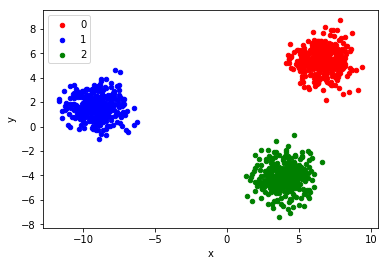

In [2]:
#Load in sample data --- from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [3]:
#Back to the tutorial --- first get bearings
index = int(0.9*len(X))
x_train, y_train = X[:index],y[:index]
x_test, y_test = X[index:], y[index:]
input_dim = X.shape[1]
output_dim = 1

model = Sequential()
model.add(Dense(5, input_dim=input_dim,activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(output_dim,activation='linear'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_train, y_train, verbose=1)

Epoch 1/1
900/900 [==============================] - 0s 142us/step - loss: 0.8256


In [4]:
y_pred = model.predict_on_batch(x_test)
y_pred = np.round(y_pred)
y_pred.resize(len(y_pred))

sum(y_pred == y_test) / (1.0*len(y_test))

0.94

### Now use tensorboard

In [6]:
index = int(0.9*len(X))
x_train, y_train = X[:index],y[:index]
x_test, y_test = X[index:], y[index:]
input_dim = X.shape[1]
output_dim = 1

#Define model
model = Sequential()
model.add(Dense(100, input_dim=input_dim,activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(output_dim,activation='linear'))
model.compile(optimizer='sgd', loss='mean_squared_error')

#Add in tensor board
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False, write_grads=True)

model.fit(x_train,y_train,epochs=10000,verbose=1,callbacks=[tensorboard])

Epoch 1/10000
900/900 [==============================] - 0s 97us/step - loss: 0.1226
Epoch 2/10000
900/900 [==============================] - 0s 47us/step - loss: 0.0450
Epoch 3/10000
900/900 [==============================] - 0s 39us/step - loss: 0.0407
Epoch 4/10000
900/900 [==============================] - 0s 54us/step - loss: 0.0392
Epoch 5/10000
900/900 [==============================] - 0s 34us/step - loss: 0.0378
Epoch 6/10000
900/900 [==============================] - 0s 37us/step - loss: 0.0372
Epoch 7/10000
900/900 [==============================] - 0s 33us/step - loss: 0.0349
Epoch 8/10000
900/900 [==============================] - 0s 35us/step - loss: 0.0339
Epoch 9/10000
900/900 [==============================] - 0s 22us/step - loss: 0.0326
Epoch 10/10000
900/900 [==============================] - 0s 36us/step - loss: 0.0329
Epoch 11/10000
900/900 [==============================] - 0s 37us/step - loss: 0.0308
Epoch 12/10000
900/900 [==============================] - 0s 41

900/900 [==============================] - 0s 28us/step - loss: 0.0067
Epoch 97/10000
900/900 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 98/10000
900/900 [==============================] - 0s 28us/step - loss: 0.0052
Epoch 99/10000
900/900 [==============================] - 0s 26us/step - loss: 0.0057
Epoch 100/10000
900/900 [==============================] - 0s 27us/step - loss: 0.0054
Epoch 101/10000
900/900 [==============================] - 0s 31us/step - loss: 0.0050
Epoch 102/10000
900/900 [==============================] - 0s 24us/step - loss: 0.0050
Epoch 103/10000
900/900 [==============================] - 0s 35us/step - loss: 0.0050
Epoch 104/10000
900/900 [==============================] - 0s 30us/step - loss: 0.0050
Epoch 105/10000
900/900 [==============================] - 0s 32us/step - loss: 0.0049
Epoch 106/10000
900/900 [==============================] - 0s 24us/step - loss: 0.0047
Epoch 107/10000
900/900 [==============================] - 0s 

900/900 [==============================] - 0s 47us/step - loss: 0.0022
Epoch 191/10000
900/900 [==============================] - 0s 34us/step - loss: 0.0020
Epoch 192/10000
900/900 [==============================] - 0s 33us/step - loss: 0.0020
Epoch 193/10000
900/900 [==============================] - 0s 125us/step - loss: 0.0020
Epoch 194/10000
900/900 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 195/10000
900/900 [==============================] - 0s 28us/step - loss: 0.0019
Epoch 196/10000
900/900 [==============================] - 0s 41us/step - loss: 0.0020
Epoch 197/10000
900/900 [==============================] - 0s 36us/step - loss: 0.0019
Epoch 198/10000
900/900 [==============================] - 0s 67us/step - loss: 0.0019
Epoch 199/10000
900/900 [==============================] - 0s 38us/step - loss: 0.0018
Epoch 200/10000
900/900 [==============================] - 0s 50us/step - loss: 0.0021
Epoch 201/10000
900/900 [==============================] -

900/900 [==============================] - 0s 28us/step - loss: 9.0891e-04
Epoch 284/10000
900/900 [==============================] - 0s 27us/step - loss: 8.9381e-04
Epoch 285/10000
900/900 [==============================] - 0s 38us/step - loss: 9.3426e-04
Epoch 286/10000
900/900 [==============================] - 0s 29us/step - loss: 8.6078e-04
Epoch 287/10000
900/900 [==============================] - 0s 33us/step - loss: 8.5543e-04
Epoch 288/10000
900/900 [==============================] - 0s 35us/step - loss: 8.6827e-04
Epoch 289/10000
900/900 [==============================] - 0s 29us/step - loss: 8.8921e-04
Epoch 290/10000
900/900 [==============================] - 0s 32us/step - loss: 8.4327e-04
Epoch 291/10000
900/900 [==============================] - 0s 29us/step - loss: 7.9784e-04
Epoch 292/10000
900/900 [==============================] - 0s 36us/step - loss: 8.6897e-04
Epoch 293/10000
900/900 [==============================] - 0s 58us/step - loss: 8.2026e-04
Epoch 294/10000

Epoch 373/10000
900/900 [==============================] - 0s 28us/step - loss: 4.1969e-04
Epoch 374/10000
900/900 [==============================] - 0s 36us/step - loss: 4.2770e-04
Epoch 375/10000
900/900 [==============================] - 0s 34us/step - loss: 3.9834e-04
Epoch 376/10000
900/900 [==============================] - 0s 36us/step - loss: 4.1228e-04
Epoch 377/10000
900/900 [==============================] - 0s 33us/step - loss: 3.9690e-04
Epoch 378/10000
900/900 [==============================] - 0s 38us/step - loss: 3.9207e-04
Epoch 379/10000
900/900 [==============================] - 0s 33us/step - loss: 3.7908e-04
Epoch 380/10000
900/900 [==============================] - 0s 31us/step - loss: 3.9253e-04
Epoch 381/10000
900/900 [==============================] - 0s 27us/step - loss: 4.0538e-04
Epoch 382/10000
900/900 [==============================] - 0s 38us/step - loss: 3.9672e-04
Epoch 383/10000
900/900 [==============================] - 0s 27us/step - loss: 3.8914e-04

900/900 [==============================] - 0s 25us/step - loss: 2.0748e-04
Epoch 464/10000
900/900 [==============================] - 0s 27us/step - loss: 1.9935e-04
Epoch 465/10000
900/900 [==============================] - 0s 24us/step - loss: 1.9935e-04
Epoch 466/10000
900/900 [==============================] - 0s 25us/step - loss: 2.2668e-04
Epoch 467/10000
900/900 [==============================] - 0s 32us/step - loss: 1.9391e-04
Epoch 468/10000
900/900 [==============================] - 0s 30us/step - loss: 2.2366e-04
Epoch 469/10000
900/900 [==============================] - 0s 31us/step - loss: 1.8877e-04
Epoch 470/10000
900/900 [==============================] - 0s 31us/step - loss: 1.9820e-04
Epoch 471/10000
900/900 [==============================] - 0s 31us/step - loss: 1.9748e-04
Epoch 472/10000
900/900 [==============================] - 0s 37us/step - loss: 1.9683e-04
Epoch 473/10000
900/900 [==============================] - 0s 29us/step - loss: 1.9736e-04
Epoch 474/10000

900/900 [==============================] - 0s 23us/step - loss: 1.1840e-04
Epoch 554/10000
900/900 [==============================] - 0s 33us/step - loss: 1.0784e-04
Epoch 555/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0717e-04
Epoch 556/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1640e-04
Epoch 557/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1052e-04
Epoch 558/10000
900/900 [==============================] - 0s 33us/step - loss: 1.0105e-04
Epoch 559/10000
900/900 [==============================] - 0s 34us/step - loss: 1.0998e-04
Epoch 560/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0600e-04
Epoch 561/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0568e-04
Epoch 562/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0172e-04
Epoch 563/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0049e-04
Epoch 564/10000

900/900 [==============================] - 0s 39us/step - loss: 6.3725e-05
Epoch 643/10000
900/900 [==============================] - 0s 36us/step - loss: 6.3476e-05
Epoch 644/10000
900/900 [==============================] - 0s 43us/step - loss: 6.2489e-05
Epoch 645/10000
900/900 [==============================] - 0s 35us/step - loss: 6.4356e-05
Epoch 646/10000
900/900 [==============================] - 0s 35us/step - loss: 6.2084e-05
Epoch 647/10000
900/900 [==============================] - 0s 30us/step - loss: 6.4669e-05
Epoch 648/10000
900/900 [==============================] - 0s 34us/step - loss: 6.1276e-05
Epoch 649/10000
900/900 [==============================] - 0s 34us/step - loss: 6.1697e-05
Epoch 650/10000
900/900 [==============================] - 0s 30us/step - loss: 6.1534e-05
Epoch 651/10000
900/900 [==============================] - 0s 32us/step - loss: 5.8885e-05
Epoch 652/10000
900/900 [==============================] - 0s 34us/step - loss: 6.0497e-05
Epoch 653/10000

900/900 [==============================] - 0s 29us/step - loss: 4.2811e-05
Epoch 733/10000
900/900 [==============================] - 0s 29us/step - loss: 4.4380e-05
Epoch 734/10000
900/900 [==============================] - 0s 42us/step - loss: 4.1722e-05
Epoch 735/10000
900/900 [==============================] - 0s 34us/step - loss: 4.3437e-05
Epoch 736/10000
900/900 [==============================] - 0s 37us/step - loss: 4.1911e-05
Epoch 737/10000
900/900 [==============================] - 0s 37us/step - loss: 4.1117e-05
Epoch 738/10000
900/900 [==============================] - 0s 33us/step - loss: 4.0492e-05
Epoch 739/10000
900/900 [==============================] - 0s 31us/step - loss: 4.2577e-05
Epoch 740/10000
900/900 [==============================] - 0s 30us/step - loss: 4.1895e-05
Epoch 741/10000
900/900 [==============================] - 0s 32us/step - loss: 4.0900e-05
Epoch 742/10000
900/900 [==============================] - 0s 30us/step - loss: 3.9880e-05
Epoch 743/10000

900/900 [==============================] - 0s 24us/step - loss: 3.3334e-05
Epoch 822/10000
900/900 [==============================] - 0s 29us/step - loss: 3.1572e-05
Epoch 823/10000
900/900 [==============================] - 0s 31us/step - loss: 3.0245e-05
Epoch 824/10000
900/900 [==============================] - 0s 30us/step - loss: 3.1087e-05
Epoch 825/10000
900/900 [==============================] - 0s 30us/step - loss: 3.0719e-05
Epoch 826/10000
900/900 [==============================] - 0s 44us/step - loss: 3.1007e-05
Epoch 827/10000
900/900 [==============================] - 0s 31us/step - loss: 3.0212e-05
Epoch 828/10000
900/900 [==============================] - 0s 29us/step - loss: 2.9677e-05
Epoch 829/10000
900/900 [==============================] - 0s 41us/step - loss: 2.9921e-05
Epoch 830/10000
900/900 [==============================] - 0s 37us/step - loss: 3.0378e-05
Epoch 831/10000
900/900 [==============================] - 0s 47us/step - loss: 3.0360e-05
Epoch 832/10000

900/900 [==============================] - 0s 33us/step - loss: 2.5467e-05
Epoch 912/10000
900/900 [==============================] - 0s 40us/step - loss: 2.3643e-05
Epoch 913/10000
900/900 [==============================] - 0s 33us/step - loss: 2.4540e-05
Epoch 914/10000
900/900 [==============================] - 0s 30us/step - loss: 2.4818e-05
Epoch 915/10000
900/900 [==============================] - 0s 39us/step - loss: 2.3868e-05
Epoch 916/10000
900/900 [==============================] - 0s 36us/step - loss: 2.4814e-05
Epoch 917/10000
900/900 [==============================] - 0s 34us/step - loss: 2.3635e-05
Epoch 918/10000
900/900 [==============================] - 0s 37us/step - loss: 2.3828e-05
Epoch 919/10000
900/900 [==============================] - 0s 33us/step - loss: 2.3303e-05
Epoch 920/10000
900/900 [==============================] - 0s 36us/step - loss: 2.4347e-05
Epoch 921/10000
900/900 [==============================] - 0s 37us/step - loss: 2.4185e-05
Epoch 922/10000

900/900 [==============================] - 0s 31us/step - loss: 2.1019e-05
Epoch 1002/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0308e-05
Epoch 1003/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0660e-05
Epoch 1004/10000
900/900 [==============================] - 0s 28us/step - loss: 2.0608e-05
Epoch 1005/10000
900/900 [==============================] - 0s 29us/step - loss: 2.1207e-05
Epoch 1006/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0254e-05
Epoch 1007/10000
900/900 [==============================] - 0s 29us/step - loss: 2.0432e-05
Epoch 1008/10000
900/900 [==============================] - 0s 28us/step - loss: 2.0662e-05
Epoch 1009/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0126e-05
Epoch 1010/10000
900/900 [==============================] - 0s 27us/step - loss: 2.0095e-05
Epoch 1011/10000
900/900 [==============================] - 0s 30us/step - loss: 2.1039e-05
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.8667e-05
Epoch 1090/10000
900/900 [==============================] - 0s 27us/step - loss: 1.8841e-05
Epoch 1091/10000
900/900 [==============================] - 0s 33us/step - loss: 1.8195e-05
Epoch 1092/10000
900/900 [==============================] - 0s 31us/step - loss: 1.8886e-05
Epoch 1093/10000
900/900 [==============================] - 0s 28us/step - loss: 1.8636e-05
Epoch 1094/10000
900/900 [==============================] - 0s 30us/step - loss: 1.9061e-05
Epoch 1095/10000
900/900 [==============================] - 0s 30us/step - loss: 1.9047e-05
Epoch 1096/10000
900/900 [==============================] - 0s 32us/step - loss: 1.9566e-05
Epoch 1097/10000
900/900 [==============================] - 0s 42us/step - loss: 1.9317e-05
Epoch 1098/10000
900/900 [==============================] - 0s 78us/step - loss: 1.8594e-05
Epoch 1099/10000
900/900 [==============================] - 0s 85us/step - loss: 1.9734e-05
Epoch

900/900 [==============================] - 0s 41us/step - loss: 2.6834e-05
Epoch 1178/10000
900/900 [==============================] - 0s 27us/step - loss: 1.8389e-05
Epoch 1179/10000
900/900 [==============================] - 0s 38us/step - loss: 1.7521e-05
Epoch 1180/10000
900/900 [==============================] - 0s 32us/step - loss: 1.7453e-05
Epoch 1181/10000
900/900 [==============================] - 0s 35us/step - loss: 1.7628e-05
Epoch 1182/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7047e-05
Epoch 1183/10000
900/900 [==============================] - 0s 35us/step - loss: 1.8093e-05
Epoch 1184/10000
900/900 [==============================] - 0s 33us/step - loss: 1.7662e-05
Epoch 1185/10000
900/900 [==============================] - 0s 34us/step - loss: 1.7543e-05
Epoch 1186/10000
900/900 [==============================] - 0s 35us/step - loss: 1.8077e-05
Epoch 1187/10000
900/900 [==============================] - 0s 37us/step - loss: 1.7887e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.7539e-05
Epoch 1266/10000
900/900 [==============================] - 0s 27us/step - loss: 1.6837e-05
Epoch 1267/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7001e-05
Epoch 1268/10000
900/900 [==============================] - 0s 29us/step - loss: 1.6718e-05
Epoch 1269/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6631e-05
Epoch 1270/10000
900/900 [==============================] - 0s 34us/step - loss: 1.7569e-05
Epoch 1271/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7585e-05
Epoch 1272/10000
900/900 [==============================] - 0s 30us/step - loss: 1.6519e-05
Epoch 1273/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6951e-05
Epoch 1274/10000
900/900 [==============================] - 0s 27us/step - loss: 1.7884e-05
Epoch 1275/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7107e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.6515e-05
Epoch 1354/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6418e-05
Epoch 1355/10000
900/900 [==============================] - 0s 26us/step - loss: 1.6878e-05
Epoch 1356/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6202e-05
Epoch 1357/10000
900/900 [==============================] - 0s 38us/step - loss: 1.6467e-05
Epoch 1358/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6242e-05
Epoch 1359/10000
900/900 [==============================] - 0s 28us/step - loss: 1.6614e-05
Epoch 1360/10000
900/900 [==============================] - 0s 31us/step - loss: 1.7122e-05
Epoch 1361/10000
900/900 [==============================] - 0s 43us/step - loss: 1.7149e-05
Epoch 1362/10000
900/900 [==============================] - 0s 43us/step - loss: 1.6164e-05
Epoch 1363/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6310e-05
Epoch

900/900 [==============================] - 0s 26us/step - loss: 1.5578e-05
Epoch 1442/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5463e-05
Epoch 1443/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5585e-05
Epoch 1444/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5544e-05
Epoch 1445/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5430e-05
Epoch 1446/10000
900/900 [==============================] - 0s 28us/step - loss: 1.5742e-05
Epoch 1447/10000
900/900 [==============================] - 0s 34us/step - loss: 1.5650e-05
Epoch 1448/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5813e-05
Epoch 1449/10000
900/900 [==============================] - 0s 28us/step - loss: 1.5913e-05
Epoch 1450/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5421e-05
Epoch 1451/10000
900/900 [==============================] - 0s 26us/step - loss: 1.5520e-05
Epoch

Epoch 1530/10000
900/900 [==============================] - 0s 34us/step - loss: 1.5818e-05
Epoch 1531/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5310e-05
Epoch 1532/10000
900/900 [==============================] - ETA: 0s - loss: 1.9296e-0 - 0s 45us/step - loss: 1.6241e-05
Epoch 1533/10000
900/900 [==============================] - 0s 114us/step - loss: 1.5102e-05
Epoch 1534/10000
900/900 [==============================] - 0s 104us/step - loss: 1.5338e-05
Epoch 1535/10000
900/900 [==============================] - 0s 50us/step - loss: 1.4978e-05
Epoch 1536/10000
900/900 [==============================] - 0s 38us/step - loss: 1.5686e-05
Epoch 1537/10000
900/900 [==============================] - 0s 39us/step - loss: 1.5657e-05
Epoch 1538/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5766e-05
Epoch 1539/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5434e-05
Epoch 1540/10000
900/900 [========================

900/900 [==============================] - 0s 30us/step - loss: 1.4765e-05
Epoch 1619/10000
900/900 [==============================] - 0s 25us/step - loss: 1.5032e-05
Epoch 1620/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4998e-05
Epoch 1621/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5133e-05
Epoch 1622/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5090e-05
Epoch 1623/10000
900/900 [==============================] - 0s 31us/step - loss: 1.5142e-05
Epoch 1624/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5151e-05
Epoch 1625/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5127e-05
Epoch 1626/10000
900/900 [==============================] - 0s 37us/step - loss: 1.5312e-05
Epoch 1627/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4771e-05
Epoch 1628/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5006e-05
Epoch

900/900 [==============================] - 0s 31us/step - loss: 1.4777e-05
Epoch 1708/10000
900/900 [==============================] - 0s 25us/step - loss: 1.6141e-05
Epoch 1709/10000
900/900 [==============================] - 0s 61us/step - loss: 1.4714e-05
Epoch 1710/10000
900/900 [==============================] - 0s 195us/step - loss: 1.4664e-05
Epoch 1711/10000
900/900 [==============================] - 0s 47us/step - loss: 1.4620e-05
Epoch 1712/10000
900/900 [==============================] - 0s 33us/step - loss: 1.4720e-05
Epoch 1713/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4739e-05
Epoch 1714/10000
900/900 [==============================] - 0s 26us/step - loss: 1.5386e-05
Epoch 1715/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4901e-05
Epoch 1716/10000
900/900 [==============================] - 0s 27us/step - loss: 1.4519e-05
Epoch 1717/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4811e-05
Epoc

900/900 [==============================] - 0s 28us/step - loss: 1.6577e-05
Epoch 1797/10000
900/900 [==============================] - 0s 38us/step - loss: 1.4890e-05
Epoch 1798/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4610e-05
Epoch 1799/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4458e-05
Epoch 1800/10000
900/900 [==============================] - 0s 35us/step - loss: 1.4569e-05
Epoch 1801/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4716e-05
Epoch 1802/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4448e-05
Epoch 1803/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4169e-05
Epoch 1804/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4625e-05
Epoch 1805/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7181e-05
Epoch 1806/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4478e-05
Epoch

900/900 [==============================] - 0s 31us/step - loss: 1.4457e-05
Epoch 1886/10000
900/900 [==============================] - 0s 22us/step - loss: 1.4143e-05
Epoch 1887/10000
900/900 [==============================] - 0s 42us/step - loss: 1.4467e-05
Epoch 1888/10000
900/900 [==============================] - 0s 42us/step - loss: 1.4255e-05
Epoch 1889/10000
900/900 [==============================] - 0s 39us/step - loss: 1.4058e-05
Epoch 1890/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4139e-05
Epoch 1891/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4373e-05
Epoch 1892/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5130e-05
Epoch 1893/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4273e-05
Epoch 1894/10000
900/900 [==============================] - 0s 26us/step - loss: 1.4565e-05
Epoch 1895/10000
900/900 [==============================] - 0s 26us/step - loss: 1.4215e-05
Epoch

900/900 [==============================] - 0s 26us/step - loss: 1.4616e-05
Epoch 1974/10000
900/900 [==============================] - 0s 23us/step - loss: 1.4005e-05
Epoch 1975/10000
900/900 [==============================] - 0s 39us/step - loss: 1.3981e-05
Epoch 1976/10000
900/900 [==============================] - 0s 33us/step - loss: 1.3708e-05
Epoch 1977/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3693e-05
Epoch 1978/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4052e-05
Epoch 1979/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4095e-05
Epoch 1980/10000
900/900 [==============================] - 0s 30us/step - loss: 1.3449e-05
Epoch 1981/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3641e-05
Epoch 1982/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4039e-05
Epoch 1983/10000
900/900 [==============================] - 0s 28us/step - loss: 1.7167e-05
Epoch

900/900 [==============================] - 0s 30us/step - loss: 1.3038e-05
Epoch 2063/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3052e-05
Epoch 2064/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3677e-05
Epoch 2065/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4137e-05
Epoch 2066/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2676e-05
Epoch 2067/10000
900/900 [==============================] - 0s 25us/step - loss: 1.3344e-05
Epoch 2068/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3252e-05
Epoch 2069/10000
900/900 [==============================] - 0s 34us/step - loss: 1.3607e-05
Epoch 2070/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3569e-05
Epoch 2071/10000
900/900 [==============================] - 0s 35us/step - loss: 1.3624e-05
Epoch 2072/10000
900/900 [==============================] - 0s 26us/step - loss: 1.3036e-05
Epoch

900/900 [==============================] - 0s 31us/step - loss: 1.3173e-05
Epoch 2151/10000
900/900 [==============================] - 0s 30us/step - loss: 1.3402e-05
Epoch 2152/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2769e-05
Epoch 2153/10000
900/900 [==============================] - 0s 25us/step - loss: 1.3102e-05
Epoch 2154/10000
900/900 [==============================] - 0s 33us/step - loss: 1.2536e-05
Epoch 2155/10000
900/900 [==============================] - 0s 27us/step - loss: 1.3406e-05
Epoch 2156/10000
900/900 [==============================] - 0s 27us/step - loss: 1.3522e-05
Epoch 2157/10000
900/900 [==============================] - 0s 30us/step - loss: 1.3156e-05
Epoch 2158/10000
900/900 [==============================] - 0s 34us/step - loss: 1.3732e-05
Epoch 2159/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2843e-05
Epoch 2160/10000
900/900 [==============================] - 0s 25us/step - loss: 1.2951e-05
Epoch

900/900 [==============================] - 0s 24us/step - loss: 1.2680e-05
Epoch 2239/10000
900/900 [==============================] - 0s 35us/step - loss: 1.3324e-05
Epoch 2240/10000
900/900 [==============================] - 0s 37us/step - loss: 1.2594e-05
Epoch 2241/10000
900/900 [==============================] - 0s 32us/step - loss: 1.2810e-05
Epoch 2242/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2999e-05
Epoch 2243/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2815e-05
Epoch 2244/10000
900/900 [==============================] - 0s 32us/step - loss: 1.2771e-05
Epoch 2245/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2828e-05
Epoch 2246/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2434e-05
Epoch 2247/10000
900/900 [==============================] - 0s 32us/step - loss: 1.2477e-05
Epoch 2248/10000
900/900 [==============================] - 0s 27us/step - loss: 1.3300e-05
Epoch

900/900 [==============================] - 0s 32us/step - loss: 1.2357e-05
Epoch 2328/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2360e-05
Epoch 2329/10000
900/900 [==============================] - 0s 39us/step - loss: 1.2931e-05
Epoch 2330/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2157e-05
Epoch 2331/10000
900/900 [==============================] - 0s 26us/step - loss: 1.2926e-05
Epoch 2332/10000
900/900 [==============================] - 0s 33us/step - loss: 1.2271e-05
Epoch 2333/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2161e-05
Epoch 2334/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2070e-05
Epoch 2335/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2462e-05
Epoch 2336/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2170e-05
Epoch 2337/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2375e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.2284e-05
Epoch 2416/10000
900/900 [==============================] - 0s 25us/step - loss: 1.2117e-05
Epoch 2417/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2255e-05
Epoch 2418/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2342e-05
Epoch 2419/10000
900/900 [==============================] - 0s 25us/step - loss: 1.1828e-05
Epoch 2420/10000
900/900 [==============================] - 0s 31us/step - loss: 1.2380e-05
Epoch 2421/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2141e-05
Epoch 2422/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1935e-05
Epoch 2423/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2179e-05
Epoch 2424/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2356e-05
Epoch 2425/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1950e-05
Epoch

900/900 [==============================] - 0s 30us/step - loss: 1.2315e-05
Epoch 2505/10000
900/900 [==============================] - 0s 25us/step - loss: 1.2234e-05
Epoch 2506/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2048e-05
Epoch 2507/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3265e-05
Epoch 2508/10000
900/900 [==============================] - 0s 31us/step - loss: 1.1644e-05
Epoch 2509/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1792e-05
Epoch 2510/10000
900/900 [==============================] - 0s 33us/step - loss: 1.2118e-05
Epoch 2511/10000
900/900 [==============================] - 0s 33us/step - loss: 1.1840e-05
Epoch 2512/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2153e-05
Epoch 2513/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4336e-05
Epoch 2514/10000
900/900 [==============================] - 0s 23us/step - loss: 1.1753e-05
Epoch

900/900 [==============================] - 0s 41us/step - loss: 1.2706e-05
Epoch 2594/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1921e-05
Epoch 2595/10000
900/900 [==============================] - 0s 36us/step - loss: 1.2122e-05
Epoch 2596/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1873e-05
Epoch 2597/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1769e-05
Epoch 2598/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1909e-05
Epoch 2599/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1751e-05
Epoch 2600/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1634e-05
Epoch 2601/10000
900/900 [==============================] - 0s 24us/step - loss: 1.2001e-05
Epoch 2602/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2259e-05
Epoch 2603/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1649e-05
Epoch

900/900 [==============================] - 0s 25us/step - loss: 1.1525e-05
Epoch 2682/10000
900/900 [==============================] - 0s 23us/step - loss: 1.1566e-05
Epoch 2683/10000
900/900 [==============================] - 0s 25us/step - loss: 1.1643e-05
Epoch 2684/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1272e-05
Epoch 2685/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1465e-05
Epoch 2686/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1645e-05
Epoch 2687/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1615e-05
Epoch 2688/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1541e-05
Epoch 2689/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1590e-05
Epoch 2690/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1838e-05
Epoch 2691/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1405e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.1365e-05
Epoch 2770/10000
900/900 [==============================] - 0s 36us/step - loss: 1.1450e-05
Epoch 2771/10000
900/900 [==============================] - 0s 38us/step - loss: 1.1308e-05
Epoch 2772/10000
900/900 [==============================] - 0s 33us/step - loss: 1.1190e-05
Epoch 2773/10000
900/900 [==============================] - 0s 35us/step - loss: 1.1466e-05
Epoch 2774/10000
900/900 [==============================] - ETA: 0s - loss: 8.6831e-0 - 0s 32us/step - loss: 1.1281e-05
Epoch 2775/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1212e-05
Epoch 2776/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1199e-05
Epoch 2777/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1195e-05
Epoch 2778/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1195e-05
Epoch 2779/10000
900/900 [==============================] - 0s 30us/s

900/900 [==============================] - 0s 27us/step - loss: 1.1454e-05
Epoch 2858/10000
900/900 [==============================] - 0s 22us/step - loss: 1.0886e-05
Epoch 2859/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1100e-05
Epoch 2860/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1328e-05
Epoch 2861/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1074e-05
Epoch 2862/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0882e-05
Epoch 2863/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1599e-05
Epoch 2864/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1186e-05
Epoch 2865/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1006e-05
Epoch 2866/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1141e-05
Epoch 2867/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1019e-05
Epoch

900/900 [==============================] - 0s 23us/step - loss: 1.1091e-05
Epoch 2947/10000
900/900 [==============================] - ETA: 0s - loss: 7.8404e-0 - 0s 27us/step - loss: 1.1154e-05
Epoch 2948/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1266e-05
Epoch 2949/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0988e-05
Epoch 2950/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0727e-05
Epoch 2951/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1099e-05
Epoch 2952/10000
900/900 [==============================] - 0s 33us/step - loss: 1.0835e-05
Epoch 2953/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1179e-05
Epoch 2954/10000
900/900 [==============================] - 0s 34us/step - loss: 1.0938e-05
Epoch 2955/10000
900/900 [==============================] - 0s 37us/step - loss: 1.0669e-05
Epoch 2956/10000
900/900 [==============================] - 0s 31us/s

900/900 [==============================] - 0s 30us/step - loss: 1.1466e-05
Epoch 3035/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0640e-05
Epoch 3036/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0711e-05
Epoch 3037/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0659e-05
Epoch 3038/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0775e-05
Epoch 3039/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0809e-05
Epoch 3040/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0493e-05
Epoch 3041/10000
900/900 [==============================] - 0s 25us/step - loss: 1.1042e-05
Epoch 3042/10000
900/900 [==============================] - 0s 35us/step - loss: 1.0501e-05
Epoch 3043/10000
900/900 [==============================] - 0s 22us/step - loss: 1.0829e-05
Epoch 3044/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0734e-05
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.0455e-05
Epoch 3124/10000
900/900 [==============================] - 0s 24us/step - loss: 1.0598e-05
Epoch 3125/10000
900/900 [==============================] - 0s 33us/step - loss: 1.1223e-05
Epoch 3126/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1244e-05
Epoch 3127/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0648e-05
Epoch 3128/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0295e-05
Epoch 3129/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0353e-05
Epoch 3130/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0559e-05
Epoch 3131/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0807e-05
Epoch 3132/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0699e-05
Epoch 3133/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0765e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.0820e-05
Epoch 3213/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0736e-05
Epoch 3214/10000
900/900 [==============================] - 0s 24us/step - loss: 1.0554e-05
Epoch 3215/10000
900/900 [==============================] - 0s 35us/step - loss: 1.0259e-05
Epoch 3216/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0126e-05
Epoch 3217/10000
900/900 [==============================] - 0s 34us/step - loss: 1.0618e-05
Epoch 3218/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0328e-05
Epoch 3219/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0392e-05
Epoch 3220/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0389e-05
Epoch 3221/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0216e-05
Epoch 3222/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0270e-05
Epoch

900/900 [==============================] - 0s 25us/step - loss: 1.0054e-05
Epoch 3302/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0109e-05
Epoch 3303/10000
900/900 [==============================] - 0s 37us/step - loss: 1.0182e-05
Epoch 3304/10000
900/900 [==============================] - 0s 33us/step - loss: 1.0498e-05
Epoch 3305/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0011e-05
Epoch 3306/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0438e-05
Epoch 3307/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0074e-05
Epoch 3308/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0300e-05
Epoch 3309/10000
900/900 [==============================] - 0s 26us/step - loss: 9.7913e-06
Epoch 3310/10000
900/900 [==============================] - 0s 37us/step - loss: 1.0501e-05
Epoch 3311/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0198e-05
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.0099e-05
Epoch 3391/10000
900/900 [==============================] - 0s 26us/step - loss: 9.8694e-06
Epoch 3392/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0199e-05
Epoch 3393/10000
900/900 [==============================] - 0s 33us/step - loss: 9.8449e-06
Epoch 3394/10000
900/900 [==============================] - 0s 28us/step - loss: 9.7865e-06
Epoch 3395/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0228e-05
Epoch 3396/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0072e-05
Epoch 3397/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0312e-05
Epoch 3398/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0039e-05
Epoch 3399/10000
900/900 [==============================] - 0s 28us/step - loss: 9.7726e-06
Epoch 3400/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0021e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 9.8788e-06
Epoch 3480/10000
900/900 [==============================] - 0s 24us/step - loss: 9.9569e-06
Epoch 3481/10000
900/900 [==============================] - 0s 31us/step - loss: 9.6472e-06
Epoch 3482/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0298e-05
Epoch 3483/10000
900/900 [==============================] - 0s 31us/step - loss: 9.6597e-06
Epoch 3484/10000
900/900 [==============================] - 0s 26us/step - loss: 9.9228e-06
Epoch 3485/10000
900/900 [==============================] - 0s 29us/step - loss: 9.9611e-06
Epoch 3486/10000
900/900 [==============================] - 0s 32us/step - loss: 9.7288e-06
Epoch 3487/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0474e-05
Epoch 3488/10000
900/900 [==============================] - 0s 36us/step - loss: 1.0075e-05
Epoch 3489/10000
900/900 [==============================] - 0s 26us/step - loss: 9.8186e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 9.4607e-06
Epoch 3569/10000
900/900 [==============================] - 0s 26us/step - loss: 9.5739e-06
Epoch 3570/10000
900/900 [==============================] - 0s 29us/step - loss: 9.7856e-06
Epoch 3571/10000
900/900 [==============================] - 0s 32us/step - loss: 9.8590e-06
Epoch 3572/10000
900/900 [==============================] - 0s 29us/step - loss: 9.6790e-06
Epoch 3573/10000
900/900 [==============================] - 0s 24us/step - loss: 9.5960e-06
Epoch 3574/10000
900/900 [==============================] - 0s 25us/step - loss: 9.9438e-06
Epoch 3575/10000
900/900 [==============================] - 0s 27us/step - loss: 9.6010e-06
Epoch 3576/10000
900/900 [==============================] - 0s 27us/step - loss: 9.7692e-06
Epoch 3577/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0026e-05
Epoch 3578/10000
900/900 [==============================] - 0s 29us/step - loss: 9.7519e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 9.8081e-06
Epoch 3657/10000
900/900 [==============================] - 0s 30us/step - loss: 9.9002e-06
Epoch 3658/10000
900/900 [==============================] - 0s 30us/step - loss: 9.6028e-06
Epoch 3659/10000
900/900 [==============================] - 0s 28us/step - loss: 9.5798e-06
Epoch 3660/10000
900/900 [==============================] - 0s 30us/step - loss: 9.3942e-06
Epoch 3661/10000
900/900 [==============================] - 0s 27us/step - loss: 9.3585e-06
Epoch 3662/10000
900/900 [==============================] - 0s 29us/step - loss: 9.4422e-06
Epoch 3663/10000
900/900 [==============================] - 0s 29us/step - loss: 9.6398e-06
Epoch 3664/10000
900/900 [==============================] - 0s 28us/step - loss: 9.5060e-06
Epoch 3665/10000
900/900 [==============================] - 0s 30us/step - loss: 9.8559e-06
Epoch 3666/10000
900/900 [==============================] - 0s 30us/step - loss: 9.6481e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 9.3517e-06
Epoch 3746/10000
900/900 [==============================] - 0s 29us/step - loss: 9.1837e-06
Epoch 3747/10000
900/900 [==============================] - 0s 31us/step - loss: 9.4935e-06
Epoch 3748/10000
900/900 [==============================] - 0s 26us/step - loss: 9.6422e-06
Epoch 3749/10000
900/900 [==============================] - 0s 30us/step - loss: 9.2693e-06
Epoch 3750/10000
900/900 [==============================] - 0s 30us/step - loss: 9.3987e-06
Epoch 3751/10000
900/900 [==============================] - 0s 30us/step - loss: 9.5111e-06
Epoch 3752/10000
900/900 [==============================] - 0s 31us/step - loss: 9.3444e-06
Epoch 3753/10000
900/900 [==============================] - 0s 38us/step - loss: 9.9167e-06
Epoch 3754/10000
900/900 [==============================] - 0s 32us/step - loss: 9.3356e-06
Epoch 3755/10000
900/900 [==============================] - 0s 32us/step - loss: 9.2684e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 9.2860e-06
Epoch 3834/10000
900/900 [==============================] - 0s 30us/step - loss: 9.3255e-06
Epoch 3835/10000
900/900 [==============================] - 0s 33us/step - loss: 9.2807e-06
Epoch 3836/10000
900/900 [==============================] - 0s 27us/step - loss: 9.1401e-06
Epoch 3837/10000
900/900 [==============================] - 0s 30us/step - loss: 9.5247e-06
Epoch 3838/10000
900/900 [==============================] - 0s 27us/step - loss: 9.4620e-06
Epoch 3839/10000
900/900 [==============================] - 0s 23us/step - loss: 9.3144e-06
Epoch 3840/10000
900/900 [==============================] - 0s 30us/step - loss: 9.4214e-06
Epoch 3841/10000
900/900 [==============================] - 0s 28us/step - loss: 9.0621e-06
Epoch 3842/10000
900/900 [==============================] - 0s 29us/step - loss: 9.2955e-06
Epoch 3843/10000
900/900 [==============================] - 0s 26us/step - loss: 9.5915e-06
Epoch

900/900 [==============================] - 0s 30us/step - loss: 9.0919e-06
Epoch 3923/10000
900/900 [==============================] - 0s 28us/step - loss: 9.0502e-06
Epoch 3924/10000
900/900 [==============================] - 0s 27us/step - loss: 9.0841e-06
Epoch 3925/10000
900/900 [==============================] - 0s 28us/step - loss: 9.2273e-06
Epoch 3926/10000
900/900 [==============================] - 0s 24us/step - loss: 9.1325e-06
Epoch 3927/10000
900/900 [==============================] - 0s 29us/step - loss: 9.0507e-06
Epoch 3928/10000
900/900 [==============================] - 0s 29us/step - loss: 9.0344e-06
Epoch 3929/10000
900/900 [==============================] - 0s 39us/step - loss: 8.9442e-06
Epoch 3930/10000
900/900 [==============================] - 0s 24us/step - loss: 9.2467e-06
Epoch 3931/10000
900/900 [==============================] - 0s 28us/step - loss: 9.2323e-06
Epoch 3932/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0306e-05
Epoch

900/900 [==============================] - 0s 27us/step - loss: 8.8893e-06
Epoch 4011/10000
900/900 [==============================] - 0s 26us/step - loss: 8.8171e-06
Epoch 4012/10000
900/900 [==============================] - 0s 29us/step - loss: 8.8432e-06
Epoch 4013/10000
900/900 [==============================] - 0s 28us/step - loss: 9.3266e-06
Epoch 4014/10000
900/900 [==============================] - 0s 33us/step - loss: 8.9496e-06
Epoch 4015/10000
900/900 [==============================] - 0s 29us/step - loss: 8.9475e-06
Epoch 4016/10000
900/900 [==============================] - 0s 31us/step - loss: 8.9855e-06
Epoch 4017/10000
900/900 [==============================] - 0s 32us/step - loss: 8.7944e-06
Epoch 4018/10000
900/900 [==============================] - 0s 33us/step - loss: 9.2006e-06
Epoch 4019/10000
900/900 [==============================] - 0s 29us/step - loss: 8.9485e-06
Epoch 4020/10000
900/900 [==============================] - 0s 34us/step - loss: 9.3598e-06
Epoch

900/900 [==============================] - 0s 28us/step - loss: 8.9830e-06
Epoch 4100/10000
900/900 [==============================] - 0s 23us/step - loss: 8.7915e-06
Epoch 4101/10000
900/900 [==============================] - 0s 23us/step - loss: 9.9339e-06
Epoch 4102/10000
900/900 [==============================] - 0s 29us/step - loss: 8.8722e-06
Epoch 4103/10000
900/900 [==============================] - 0s 28us/step - loss: 8.7842e-06
Epoch 4104/10000
900/900 [==============================] - 0s 30us/step - loss: 8.8794e-06
Epoch 4105/10000
900/900 [==============================] - 0s 29us/step - loss: 8.7325e-06
Epoch 4106/10000
900/900 [==============================] - 0s 29us/step - loss: 8.9386e-06
Epoch 4107/10000
900/900 [==============================] - 0s 27us/step - loss: 8.9407e-06
Epoch 4108/10000
900/900 [==============================] - 0s 27us/step - loss: 8.9306e-06
Epoch 4109/10000
900/900 [==============================] - 0s 27us/step - loss: 1.4706e-05
Epoch

900/900 [==============================] - 0s 29us/step - loss: 8.8716e-06
Epoch 4189/10000
900/900 [==============================] - 0s 26us/step - loss: 8.7223e-06
Epoch 4190/10000
900/900 [==============================] - 0s 38us/step - loss: 8.5188e-06
Epoch 4191/10000
900/900 [==============================] - 0s 31us/step - loss: 8.4118e-06
Epoch 4192/10000
900/900 [==============================] - 0s 28us/step - loss: 8.5342e-06
Epoch 4193/10000
900/900 [==============================] - 0s 30us/step - loss: 1.6578e-05
Epoch 4194/10000
900/900 [==============================] - 0s 28us/step - loss: 9.0435e-06
Epoch 4195/10000
900/900 [==============================] - 0s 27us/step - loss: 8.8000e-06
Epoch 4196/10000
900/900 [==============================] - 0s 29us/step - loss: 9.1071e-06
Epoch 4197/10000
900/900 [==============================] - 0s 30us/step - loss: 8.7237e-06
Epoch 4198/10000
900/900 [==============================] - 0s 27us/step - loss: 8.4356e-06
Epoch

900/900 [==============================] - 0s 26us/step - loss: 8.2224e-06
Epoch 4277/10000
900/900 [==============================] - 0s 24us/step - loss: 8.6713e-06
Epoch 4278/10000
900/900 [==============================] - 0s 33us/step - loss: 8.5018e-06
Epoch 4279/10000
900/900 [==============================] - 0s 28us/step - loss: 8.5877e-06
Epoch 4280/10000
900/900 [==============================] - 0s 24us/step - loss: 8.3135e-06
Epoch 4281/10000
900/900 [==============================] - 0s 26us/step - loss: 8.8577e-06
Epoch 4282/10000
900/900 [==============================] - 0s 25us/step - loss: 8.4628e-06
Epoch 4283/10000
900/900 [==============================] - 0s 27us/step - loss: 8.4524e-06
Epoch 4284/10000
900/900 [==============================] - 0s 27us/step - loss: 8.5335e-06
Epoch 4285/10000
900/900 [==============================] - 0s 28us/step - loss: 9.3035e-06
Epoch 4286/10000
900/900 [==============================] - 0s 32us/step - loss: 8.6368e-06
Epoch

900/900 [==============================] - 0s 26us/step - loss: 8.5821e-06
Epoch 4365/10000
900/900 [==============================] - 0s 24us/step - loss: 8.0726e-06
Epoch 4366/10000
900/900 [==============================] - 0s 32us/step - loss: 8.8955e-06
Epoch 4367/10000
900/900 [==============================] - 0s 32us/step - loss: 8.6054e-06
Epoch 4368/10000
900/900 [==============================] - 0s 31us/step - loss: 8.2209e-06
Epoch 4369/10000
900/900 [==============================] - 0s 32us/step - loss: 8.2661e-06
Epoch 4370/10000
900/900 [==============================] - 0s 25us/step - loss: 9.4114e-06
Epoch 4371/10000
900/900 [==============================] - 0s 29us/step - loss: 8.6258e-06
Epoch 4372/10000
900/900 [==============================] - 0s 29us/step - loss: 8.3966e-06
Epoch 4373/10000
900/900 [==============================] - 0s 25us/step - loss: 8.6788e-06
Epoch 4374/10000
900/900 [==============================] - 0s 27us/step - loss: 8.3835e-06
Epoch

900/900 [==============================] - 0s 26us/step - loss: 8.3936e-06
Epoch 4454/10000
900/900 [==============================] - 0s 31us/step - loss: 8.1652e-06
Epoch 4455/10000
900/900 [==============================] - 0s 31us/step - loss: 8.5262e-06
Epoch 4456/10000
900/900 [==============================] - 0s 26us/step - loss: 8.4960e-06
Epoch 4457/10000
900/900 [==============================] - 0s 34us/step - loss: 8.5868e-06
Epoch 4458/10000
900/900 [==============================] - 0s 31us/step - loss: 8.4046e-06
Epoch 4459/10000
900/900 [==============================] - 0s 26us/step - loss: 8.1925e-06
Epoch 4460/10000
900/900 [==============================] - 0s 26us/step - loss: 8.1914e-06
Epoch 4461/10000
900/900 [==============================] - 0s 31us/step - loss: 8.1939e-06
Epoch 4462/10000
900/900 [==============================] - 0s 27us/step - loss: 8.3074e-06
Epoch 4463/10000
900/900 [==============================] - 0s 28us/step - loss: 8.4728e-06
Epoch

900/900 [==============================] - 0s 34us/step - loss: 1.9148e-05
Epoch 4542/10000
900/900 [==============================] - 0s 27us/step - loss: 8.6700e-06
Epoch 4543/10000
900/900 [==============================] - 0s 32us/step - loss: 8.2098e-06
Epoch 4544/10000
900/900 [==============================] - 0s 29us/step - loss: 8.6363e-06
Epoch 4545/10000
900/900 [==============================] - 0s 31us/step - loss: 8.0247e-06
Epoch 4546/10000
900/900 [==============================] - 0s 29us/step - loss: 8.5792e-06
Epoch 4547/10000
900/900 [==============================] - 0s 28us/step - loss: 8.1942e-06
Epoch 4548/10000
900/900 [==============================] - 0s 27us/step - loss: 8.3058e-06
Epoch 4549/10000
900/900 [==============================] - 0s 26us/step - loss: 8.3769e-06
Epoch 4550/10000
900/900 [==============================] - 0s 25us/step - loss: 8.5527e-06
Epoch 4551/10000
900/900 [==============================] - 0s 29us/step - loss: 8.3190e-06
Epoch

900/900 [==============================] - 0s 26us/step - loss: 8.3294e-06
Epoch 4630/10000
900/900 [==============================] - 0s 30us/step - loss: 7.9437e-06
Epoch 4631/10000
900/900 [==============================] - 0s 24us/step - loss: 9.0187e-06
Epoch 4632/10000
900/900 [==============================] - 0s 30us/step - loss: 7.9994e-06
Epoch 4633/10000
900/900 [==============================] - 0s 32us/step - loss: 7.9758e-06
Epoch 4634/10000
900/900 [==============================] - 0s 25us/step - loss: 8.6975e-06
Epoch 4635/10000
900/900 [==============================] - 0s 37us/step - loss: 8.0793e-06
Epoch 4636/10000
900/900 [==============================] - 0s 29us/step - loss: 8.1322e-06
Epoch 4637/10000
900/900 [==============================] - 0s 30us/step - loss: 8.0122e-06
Epoch 4638/10000
900/900 [==============================] - 0s 27us/step - loss: 8.0244e-06
Epoch 4639/10000
900/900 [==============================] - 0s 30us/step - loss: 8.1808e-06
Epoch

900/900 [==============================] - 0s 33us/step - loss: 7.9385e-06
Epoch 4719/10000
900/900 [==============================] - 0s 25us/step - loss: 8.2743e-06
Epoch 4720/10000
900/900 [==============================] - 0s 24us/step - loss: 7.8251e-06
Epoch 4721/10000
900/900 [==============================] - 0s 39us/step - loss: 8.2047e-06
Epoch 4722/10000
900/900 [==============================] - 0s 27us/step - loss: 8.1072e-06
Epoch 4723/10000
900/900 [==============================] - 0s 39us/step - loss: 8.2895e-06
Epoch 4724/10000
900/900 [==============================] - 0s 29us/step - loss: 7.7926e-06
Epoch 4725/10000
900/900 [==============================] - 0s 35us/step - loss: 7.8934e-06
Epoch 4726/10000
900/900 [==============================] - 0s 36us/step - loss: 8.4066e-06
Epoch 4727/10000
900/900 [==============================] - 0s 30us/step - loss: 7.7948e-06
Epoch 4728/10000
900/900 [==============================] - 0s 27us/step - loss: 8.2460e-06
Epoch

900/900 [==============================] - 0s 28us/step - loss: 7.8366e-06
Epoch 4807/10000
900/900 [==============================] - 0s 38us/step - loss: 8.6172e-06
Epoch 4808/10000
900/900 [==============================] - 0s 65us/step - loss: 7.6314e-06
Epoch 4809/10000
900/900 [==============================] - 0s 49us/step - loss: 7.8894e-06
Epoch 4810/10000
900/900 [==============================] - 0s 48us/step - loss: 7.9068e-06
Epoch 4811/10000
900/900 [==============================] - 0s 37us/step - loss: 7.9412e-06
Epoch 4812/10000
900/900 [==============================] - 0s 44us/step - loss: 7.8481e-06
Epoch 4813/10000
900/900 [==============================] - 0s 32us/step - loss: 7.8143e-06
Epoch 4814/10000
900/900 [==============================] - 0s 28us/step - loss: 7.7413e-06
Epoch 4815/10000
900/900 [==============================] - 0s 28us/step - loss: 8.0987e-06
Epoch 4816/10000
900/900 [==============================] - 0s 29us/step - loss: 7.7988e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 7.9862e-06
Epoch 4896/10000
900/900 [==============================] - 0s 28us/step - loss: 7.8552e-06
Epoch 4897/10000
900/900 [==============================] - 0s 31us/step - loss: 7.9333e-06
Epoch 4898/10000
900/900 [==============================] - 0s 30us/step - loss: 9.1757e-06
Epoch 4899/10000
900/900 [==============================] - 0s 28us/step - loss: 7.5921e-06
Epoch 4900/10000
900/900 [==============================] - 0s 29us/step - loss: 7.9854e-06
Epoch 4901/10000
900/900 [==============================] - 0s 26us/step - loss: 8.0604e-06
Epoch 4902/10000
900/900 [==============================] - 0s 28us/step - loss: 7.6489e-06
Epoch 4903/10000
900/900 [==============================] - 0s 28us/step - loss: 7.7618e-06
Epoch 4904/10000
900/900 [==============================] - 0s 27us/step - loss: 7.5981e-06
Epoch 4905/10000
900/900 [==============================] - 0s 27us/step - loss: 7.6513e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 9.6215e-06
Epoch 4984/10000
900/900 [==============================] - 0s 25us/step - loss: 7.9779e-06
Epoch 4985/10000
900/900 [==============================] - 0s 30us/step - loss: 7.6095e-06
Epoch 4986/10000
900/900 [==============================] - 0s 28us/step - loss: 7.5919e-06
Epoch 4987/10000
900/900 [==============================] - 0s 30us/step - loss: 7.5430e-06
Epoch 4988/10000
900/900 [==============================] - 0s 28us/step - loss: 7.4750e-06
Epoch 4989/10000
900/900 [==============================] - 0s 27us/step - loss: 7.5590e-06
Epoch 4990/10000
900/900 [==============================] - 0s 27us/step - loss: 7.9694e-06
Epoch 4991/10000
900/900 [==============================] - 0s 29us/step - loss: 7.4390e-06
Epoch 4992/10000
900/900 [==============================] - 0s 29us/step - loss: 7.6034e-06
Epoch 4993/10000
900/900 [==============================] - 0s 27us/step - loss: 7.3619e-06
Epoch

900/900 [==============================] - 0s 23us/step - loss: 8.2423e-06
Epoch 5073/10000
900/900 [==============================] - 0s 28us/step - loss: 7.6411e-06
Epoch 5074/10000
900/900 [==============================] - 0s 30us/step - loss: 7.6040e-06
Epoch 5075/10000
900/900 [==============================] - 0s 31us/step - loss: 7.9658e-06
Epoch 5076/10000
900/900 [==============================] - 0s 30us/step - loss: 7.4520e-06
Epoch 5077/10000
900/900 [==============================] - 0s 25us/step - loss: 7.6759e-06
Epoch 5078/10000
900/900 [==============================] - 0s 28us/step - loss: 8.2862e-06
Epoch 5079/10000
900/900 [==============================] - 0s 30us/step - loss: 7.4952e-06
Epoch 5080/10000
900/900 [==============================] - 0s 31us/step - loss: 7.6191e-06
Epoch 5081/10000
900/900 [==============================] - 0s 26us/step - loss: 7.5963e-06
Epoch 5082/10000
900/900 [==============================] - 0s 27us/step - loss: 7.4941e-06
Epoch

900/900 [==============================] - 0s 30us/step - loss: 7.2565e-06
Epoch 5162/10000
900/900 [==============================] - 0s 32us/step - loss: 7.5087e-06
Epoch 5163/10000
900/900 [==============================] - 0s 26us/step - loss: 7.6760e-06
Epoch 5164/10000
900/900 [==============================] - 0s 30us/step - loss: 7.2416e-06
Epoch 5165/10000
900/900 [==============================] - 0s 27us/step - loss: 7.5475e-06
Epoch 5166/10000
900/900 [==============================] - 0s 27us/step - loss: 7.4703e-06
Epoch 5167/10000
900/900 [==============================] - 0s 29us/step - loss: 7.4317e-06
Epoch 5168/10000
900/900 [==============================] - 0s 26us/step - loss: 7.4725e-06
Epoch 5169/10000
900/900 [==============================] - 0s 27us/step - loss: 8.0266e-06
Epoch 5170/10000
900/900 [==============================] - 0s 27us/step - loss: 7.4064e-06
Epoch 5171/10000
900/900 [==============================] - 0s 29us/step - loss: 7.2338e-06
Epoch

900/900 [==============================] - 0s 28us/step - loss: 7.4305e-06
Epoch 5250/10000
900/900 [==============================] - 0s 37us/step - loss: 7.4513e-06
Epoch 5251/10000
900/900 [==============================] - 0s 32us/step - loss: 7.6793e-06
Epoch 5252/10000
900/900 [==============================] - 0s 36us/step - loss: 7.5629e-06
Epoch 5253/10000
900/900 [==============================] - 0s 36us/step - loss: 7.6028e-06
Epoch 5254/10000
900/900 [==============================] - 0s 29us/step - loss: 7.4584e-06
Epoch 5255/10000
900/900 [==============================] - 0s 26us/step - loss: 7.3281e-06
Epoch 5256/10000
900/900 [==============================] - 0s 27us/step - loss: 7.4005e-06
Epoch 5257/10000
900/900 [==============================] - 0s 30us/step - loss: 7.1834e-06
Epoch 5258/10000
900/900 [==============================] - 0s 26us/step - loss: 7.4432e-06
Epoch 5259/10000
900/900 [==============================] - 0s 28us/step - loss: 7.5235e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 7.0076e-06
Epoch 5339/10000
900/900 [==============================] - 0s 29us/step - loss: 7.2890e-06
Epoch 5340/10000
900/900 [==============================] - 0s 26us/step - loss: 7.6609e-06
Epoch 5341/10000
900/900 [==============================] - 0s 30us/step - loss: 7.3231e-06
Epoch 5342/10000
900/900 [==============================] - 0s 28us/step - loss: 7.3100e-06
Epoch 5343/10000
900/900 [==============================] - 0s 25us/step - loss: 7.2263e-06
Epoch 5344/10000
900/900 [==============================] - 0s 30us/step - loss: 7.3357e-06
Epoch 5345/10000
900/900 [==============================] - 0s 28us/step - loss: 7.1906e-06
Epoch 5346/10000
900/900 [==============================] - 0s 27us/step - loss: 7.6861e-06
Epoch 5347/10000
900/900 [==============================] - 0s 27us/step - loss: 7.1708e-06
Epoch 5348/10000
900/900 [==============================] - 0s 25us/step - loss: 7.5876e-06
Epoch

900/900 [==============================] - 0s 23us/step - loss: 7.0895e-06
Epoch 5427/10000
900/900 [==============================] - 0s 30us/step - loss: 7.1338e-06
Epoch 5428/10000
900/900 [==============================] - 0s 27us/step - loss: 6.9916e-06
Epoch 5429/10000
900/900 [==============================] - 0s 27us/step - loss: 6.9995e-06
Epoch 5430/10000
900/900 [==============================] - 0s 30us/step - loss: 7.0275e-06
Epoch 5431/10000
900/900 [==============================] - 0s 26us/step - loss: 7.0860e-06
Epoch 5432/10000
900/900 [==============================] - 0s 31us/step - loss: 7.1457e-06
Epoch 5433/10000
900/900 [==============================] - 0s 29us/step - loss: 7.0989e-06
Epoch 5434/10000
900/900 [==============================] - ETA: 0s - loss: 3.1521e-0 - 0s 32us/step - loss: 7.2479e-06
Epoch 5435/10000
900/900 [==============================] - 0s 31us/step - loss: 7.3459e-06
Epoch 5436/10000
900/900 [==============================] - 0s 31us/s

900/900 [==============================] - 0s 26us/step - loss: 7.0011e-06
Epoch 5515/10000
900/900 [==============================] - 0s 25us/step - loss: 6.7612e-06
Epoch 5516/10000
900/900 [==============================] - 0s 24us/step - loss: 7.0526e-06
Epoch 5517/10000
900/900 [==============================] - 0s 34us/step - loss: 7.3076e-06
Epoch 5518/10000
900/900 [==============================] - 0s 27us/step - loss: 7.0566e-06
Epoch 5519/10000
900/900 [==============================] - 0s 27us/step - loss: 7.0916e-06
Epoch 5520/10000
900/900 [==============================] - 0s 29us/step - loss: 7.6273e-06
Epoch 5521/10000
900/900 [==============================] - 0s 30us/step - loss: 7.0310e-06
Epoch 5522/10000
900/900 [==============================] - 0s 27us/step - loss: 7.0226e-06
Epoch 5523/10000
900/900 [==============================] - 0s 29us/step - loss: 7.4075e-06
Epoch 5524/10000
900/900 [==============================] - 0s 29us/step - loss: 7.0586e-06
Epoch

900/900 [==============================] - 0s 28us/step - loss: 6.7020e-06
Epoch 5604/10000
900/900 [==============================] - 0s 27us/step - loss: 6.8076e-06
Epoch 5605/10000
900/900 [==============================] - 0s 35us/step - loss: 7.3094e-06
Epoch 5606/10000
900/900 [==============================] - 0s 31us/step - loss: 6.7490e-06
Epoch 5607/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1365e-05
Epoch 5608/10000
900/900 [==============================] - 0s 31us/step - loss: 6.9167e-06
Epoch 5609/10000
900/900 [==============================] - 0s 23us/step - loss: 7.0011e-06
Epoch 5610/10000
900/900 [==============================] - 0s 27us/step - loss: 7.0921e-06
Epoch 5611/10000
900/900 [==============================] - 0s 26us/step - loss: 7.1617e-06
Epoch 5612/10000
900/900 [==============================] - 0s 31us/step - loss: 6.8403e-06
Epoch 5613/10000
900/900 [==============================] - 0s 29us/step - loss: 6.8987e-06
Epoch

900/900 [==============================] - 0s 30us/step - loss: 7.0266e-06
Epoch 5693/10000
900/900 [==============================] - 0s 28us/step - loss: 6.9520e-06
Epoch 5694/10000
900/900 [==============================] - 0s 28us/step - loss: 6.9626e-06
Epoch 5695/10000
900/900 [==============================] - 0s 30us/step - loss: 6.7647e-06
Epoch 5696/10000
900/900 [==============================] - 0s 37us/step - loss: 6.8721e-06
Epoch 5697/10000
900/900 [==============================] - 0s 34us/step - loss: 6.9046e-06
Epoch 5698/10000
900/900 [==============================] - 0s 31us/step - loss: 6.9640e-06
Epoch 5699/10000
900/900 [==============================] - 0s 30us/step - loss: 6.9214e-06
Epoch 5700/10000
900/900 [==============================] - 0s 27us/step - loss: 7.1325e-06
Epoch 5701/10000
900/900 [==============================] - 0s 32us/step - loss: 7.1559e-06
Epoch 5702/10000
900/900 [==============================] - 0s 26us/step - loss: 6.7499e-06
Epoch

900/900 [==============================] - 0s 30us/step - loss: 6.7313e-06
Epoch 5782/10000
900/900 [==============================] - 0s 27us/step - loss: 6.6746e-06
Epoch 5783/10000
900/900 [==============================] - 0s 32us/step - loss: 6.6637e-06
Epoch 5784/10000
900/900 [==============================] - 0s 30us/step - loss: 7.1993e-06
Epoch 5785/10000
900/900 [==============================] - 0s 38us/step - loss: 6.8669e-06
Epoch 5786/10000
900/900 [==============================] - 0s 36us/step - loss: 8.2671e-06
Epoch 5787/10000
900/900 [==============================] - 0s 44us/step - loss: 6.6645e-06
Epoch 5788/10000
900/900 [==============================] - 0s 31us/step - loss: 6.6145e-06
Epoch 5789/10000
900/900 [==============================] - 0s 33us/step - loss: 6.5524e-06
Epoch 5790/10000
900/900 [==============================] - 0s 31us/step - loss: 6.9276e-06
Epoch 5791/10000
900/900 [==============================] - 0s 44us/step - loss: 6.7821e-06
Epoch

900/900 [==============================] - 0s 31us/step - loss: 6.6922e-06
Epoch 5871/10000
900/900 [==============================] - 0s 32us/step - loss: 6.5964e-06
Epoch 5872/10000
900/900 [==============================] - 0s 31us/step - loss: 6.6901e-06
Epoch 5873/10000
900/900 [==============================] - 0s 26us/step - loss: 6.6649e-06
Epoch 5874/10000
900/900 [==============================] - 0s 27us/step - loss: 6.4942e-06
Epoch 5875/10000
900/900 [==============================] - 0s 31us/step - loss: 6.6693e-06
Epoch 5876/10000
900/900 [==============================] - 0s 31us/step - loss: 6.5492e-06
Epoch 5877/10000
900/900 [==============================] - 0s 43us/step - loss: 6.6079e-06
Epoch 5878/10000
900/900 [==============================] - 0s 36us/step - loss: 6.6437e-06
Epoch 5879/10000
900/900 [==============================] - 0s 70us/step - loss: 6.8127e-06
Epoch 5880/10000
900/900 [==============================] - 0s 36us/step - loss: 6.8428e-06
Epoch

900/900 [==============================] - 0s 33us/step - loss: 6.5501e-06
Epoch 5959/10000
900/900 [==============================] - 0s 22us/step - loss: 7.2854e-06
Epoch 5960/10000
900/900 [==============================] - 0s 30us/step - loss: 6.6284e-06
Epoch 5961/10000
900/900 [==============================] - 0s 33us/step - loss: 6.5734e-06
Epoch 5962/10000
900/900 [==============================] - 0s 29us/step - loss: 6.5268e-06
Epoch 5963/10000
900/900 [==============================] - 0s 31us/step - loss: 6.5694e-06
Epoch 5964/10000
900/900 [==============================] - 0s 38us/step - loss: 6.8271e-06
Epoch 5965/10000
900/900 [==============================] - 0s 40us/step - loss: 6.8890e-06
Epoch 5966/10000
900/900 [==============================] - 0s 49us/step - loss: 6.6527e-06
Epoch 5967/10000
900/900 [==============================] - 0s 37us/step - loss: 7.1718e-06
Epoch 5968/10000
900/900 [==============================] - 0s 30us/step - loss: 6.5905e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 6.5523e-06
Epoch 6048/10000
900/900 [==============================] - 0s 48us/step - loss: 8.6125e-06
Epoch 6049/10000
900/900 [==============================] - 0s 30us/step - loss: 6.6428e-06
Epoch 6050/10000
900/900 [==============================] - 0s 33us/step - loss: 6.5024e-06
Epoch 6051/10000
900/900 [==============================] - 0s 40us/step - loss: 6.4497e-06
Epoch 6052/10000
900/900 [==============================] - 0s 32us/step - loss: 6.6906e-06
Epoch 6053/10000
900/900 [==============================] - 0s 33us/step - loss: 6.5668e-06
Epoch 6054/10000
900/900 [==============================] - 0s 31us/step - loss: 6.2148e-06
Epoch 6055/10000
900/900 [==============================] - 0s 35us/step - loss: 6.8204e-06
Epoch 6056/10000
900/900 [==============================] - 0s 37us/step - loss: 6.5451e-06
Epoch 6057/10000
900/900 [==============================] - 0s 60us/step - loss: 6.4768e-06
Epoch

900/900 [==============================] - 0s 25us/step - loss: 6.3822e-06
Epoch 6137/10000
900/900 [==============================] - 0s 27us/step - loss: 6.9128e-06
Epoch 6138/10000
900/900 [==============================] - 0s 30us/step - loss: 6.4110e-06
Epoch 6139/10000
900/900 [==============================] - 0s 28us/step - loss: 7.1916e-06
Epoch 6140/10000
900/900 [==============================] - 0s 27us/step - loss: 6.4724e-06
Epoch 6141/10000
900/900 [==============================] - 0s 28us/step - loss: 6.5306e-06
Epoch 6142/10000
900/900 [==============================] - 0s 24us/step - loss: 6.3515e-06
Epoch 6143/10000
900/900 [==============================] - 0s 23us/step - loss: 6.6827e-06
Epoch 6144/10000
900/900 [==============================] - 0s 27us/step - loss: 6.2102e-06
Epoch 6145/10000
900/900 [==============================] - 0s 27us/step - loss: 6.4586e-06
Epoch 6146/10000
900/900 [==============================] - 0s 28us/step - loss: 6.2984e-06
Epoch

900/900 [==============================] - 0s 43us/step - loss: 6.3740e-06
Epoch 6225/10000
900/900 [==============================] - 0s 38us/step - loss: 6.2214e-06
Epoch 6226/10000
900/900 [==============================] - 0s 37us/step - loss: 6.2801e-06
Epoch 6227/10000
900/900 [==============================] - 0s 71us/step - loss: 6.5055e-06
Epoch 6228/10000
900/900 [==============================] - 0s 61us/step - loss: 6.3246e-06
Epoch 6229/10000
900/900 [==============================] - 0s 37us/step - loss: 6.3854e-06
Epoch 6230/10000
900/900 [==============================] - 0s 30us/step - loss: 6.3024e-06
Epoch 6231/10000
900/900 [==============================] - 0s 50us/step - loss: 6.2978e-06
Epoch 6232/10000
900/900 [==============================] - 0s 55us/step - loss: 6.4867e-06
Epoch 6233/10000
900/900 [==============================] - 0s 173us/step - loss: 6.3893e-06
Epoch 6234/10000
900/900 [==============================] - 0s 80us/step - loss: 6.4780e-06
Epoc

900/900 [==============================] - 0s 28us/step - loss: 6.2770e-06
Epoch 6314/10000
900/900 [==============================] - 0s 30us/step - loss: 6.2626e-06
Epoch 6315/10000
900/900 [==============================] - 0s 37us/step - loss: 6.3825e-06
Epoch 6316/10000
900/900 [==============================] - 0s 31us/step - loss: 6.3163e-06
Epoch 6317/10000
900/900 [==============================] - 0s 30us/step - loss: 6.2696e-06
Epoch 6318/10000
900/900 [==============================] - 0s 31us/step - loss: 6.1956e-06
Epoch 6319/10000
900/900 [==============================] - 0s 27us/step - loss: 7.2656e-06
Epoch 6320/10000
900/900 [==============================] - 0s 31us/step - loss: 6.2155e-06
Epoch 6321/10000
900/900 [==============================] - 0s 27us/step - loss: 6.2799e-06
Epoch 6322/10000
900/900 [==============================] - 0s 30us/step - loss: 6.2199e-06
Epoch 6323/10000
900/900 [==============================] - 0s 29us/step - loss: 6.1614e-06
Epoch

900/900 [==============================] - 0s 25us/step - loss: 6.2672e-06
Epoch 6402/10000
900/900 [==============================] - 0s 34us/step - loss: 6.3112e-06
Epoch 6403/10000
900/900 [==============================] - 0s 27us/step - loss: 6.1226e-06
Epoch 6404/10000
900/900 [==============================] - 0s 28us/step - loss: 6.3267e-06
Epoch 6405/10000
900/900 [==============================] - 0s 30us/step - loss: 6.6755e-06
Epoch 6406/10000
900/900 [==============================] - 0s 24us/step - loss: 6.0147e-06
Epoch 6407/10000
900/900 [==============================] - 0s 33us/step - loss: 6.1342e-06
Epoch 6408/10000
900/900 [==============================] - 0s 35us/step - loss: 6.3748e-06
Epoch 6409/10000
900/900 [==============================] - 0s 29us/step - loss: 6.0758e-06
Epoch 6410/10000
900/900 [==============================] - 0s 50us/step - loss: 6.4046e-06
Epoch 6411/10000
900/900 [==============================] - 0s 26us/step - loss: 6.2208e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 6.0637e-06
Epoch 6491/10000
900/900 [==============================] - 0s 23us/step - loss: 6.0322e-06
Epoch 6492/10000
900/900 [==============================] - 0s 33us/step - loss: 5.9508e-06
Epoch 6493/10000
900/900 [==============================] - 0s 32us/step - loss: 5.9859e-06
Epoch 6494/10000
900/900 [==============================] - 0s 30us/step - loss: 5.9199e-06
Epoch 6495/10000
900/900 [==============================] - 0s 30us/step - loss: 5.7461e-06
Epoch 6496/10000
900/900 [==============================] - 0s 28us/step - loss: 6.2321e-06
Epoch 6497/10000
900/900 [==============================] - 0s 32us/step - loss: 5.9331e-06
Epoch 6498/10000
900/900 [==============================] - 0s 28us/step - loss: 6.1089e-06
Epoch 6499/10000
900/900 [==============================] - 0s 33us/step - loss: 6.0113e-06
Epoch 6500/10000
900/900 [==============================] - 0s 32us/step - loss: 6.2249e-06
Epoch

900/900 [==============================] - 0s 24us/step - loss: 5.8747e-06
Epoch 6580/10000
900/900 [==============================] - 0s 30us/step - loss: 5.8450e-06
Epoch 6581/10000
900/900 [==============================] - 0s 30us/step - loss: 5.6919e-06
Epoch 6582/10000
900/900 [==============================] - 0s 26us/step - loss: 5.7955e-06
Epoch 6583/10000
900/900 [==============================] - 0s 28us/step - loss: 5.7611e-06
Epoch 6584/10000
900/900 [==============================] - 0s 32us/step - loss: 6.2717e-06
Epoch 6585/10000
900/900 [==============================] - 0s 27us/step - loss: 5.9229e-06
Epoch 6586/10000
900/900 [==============================] - 0s 29us/step - loss: 6.2098e-06
Epoch 6587/10000
900/900 [==============================] - 0s 30us/step - loss: 5.8108e-06
Epoch 6588/10000
900/900 [==============================] - 0s 28us/step - loss: 5.8304e-06
Epoch 6589/10000
900/900 [==============================] - 0s 24us/step - loss: 5.9558e-06
Epoch

900/900 [==============================] - 0s 44us/step - loss: 5.8420e-06
Epoch 6668/10000
900/900 [==============================] - 0s 39us/step - loss: 5.5695e-06
Epoch 6669/10000
900/900 [==============================] - 0s 47us/step - loss: 5.7974e-06
Epoch 6670/10000
900/900 [==============================] - 0s 32us/step - loss: 5.7690e-06
Epoch 6671/10000
900/900 [==============================] - 0s 34us/step - loss: 5.9093e-06
Epoch 6672/10000
900/900 [==============================] - 0s 32us/step - loss: 5.8669e-06
Epoch 6673/10000
900/900 [==============================] - 0s 30us/step - loss: 5.8266e-06
Epoch 6674/10000
900/900 [==============================] - 0s 30us/step - loss: 5.7195e-06
Epoch 6675/10000
900/900 [==============================] - 0s 30us/step - loss: 5.6689e-06
Epoch 6676/10000
900/900 [==============================] - 0s 27us/step - loss: 5.7495e-06
Epoch 6677/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0887e-05
Epoch

900/900 [==============================] - 0s 51us/step - loss: 5.5309e-06
Epoch 6757/10000
900/900 [==============================] - 0s 30us/step - loss: 5.7210e-06
Epoch 6758/10000
900/900 [==============================] - 0s 33us/step - loss: 5.5258e-06
Epoch 6759/10000
900/900 [==============================] - 0s 28us/step - loss: 5.7091e-06
Epoch 6760/10000
900/900 [==============================] - 0s 55us/step - loss: 5.7712e-06
Epoch 6761/10000
900/900 [==============================] - 0s 84us/step - loss: 5.7145e-06
Epoch 6762/10000
900/900 [==============================] - 0s 49us/step - loss: 5.8506e-06
Epoch 6763/10000
900/900 [==============================] - 0s 99us/step - loss: 5.6093e-06
Epoch 6764/10000
900/900 [==============================] - 0s 57us/step - loss: 5.9297e-06
Epoch 6765/10000
900/900 [==============================] - 0s 31us/step - loss: 5.6814e-06
Epoch 6766/10000
900/900 [==============================] - 0s 31us/step - loss: 5.7194e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 5.6143e-06
Epoch 6846/10000
900/900 [==============================] - 0s 34us/step - loss: 5.6446e-06
Epoch 6847/10000
900/900 [==============================] - 0s 37us/step - loss: 5.5468e-06
Epoch 6848/10000
900/900 [==============================] - 0s 26us/step - loss: 5.4692e-06
Epoch 6849/10000
900/900 [==============================] - 0s 26us/step - loss: 5.6026e-06
Epoch 6850/10000
900/900 [==============================] - 0s 28us/step - loss: 5.4631e-06
Epoch 6851/10000
900/900 [==============================] - 0s 38us/step - loss: 5.4873e-06
Epoch 6852/10000
900/900 [==============================] - 0s 31us/step - loss: 5.5972e-06
Epoch 6853/10000
900/900 [==============================] - 0s 27us/step - loss: 6.4262e-06
Epoch 6854/10000
900/900 [==============================] - 0s 38us/step - loss: 5.4762e-06
Epoch 6855/10000
900/900 [==============================] - 0s 35us/step - loss: 5.5536e-06
Epoch

KeyboardInterrupt: 